In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
import pandas as pd
from sklearn import datasets

In [3]:
data = datasets.load_wine()

In [4]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])

In [5]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

In [6]:
X_prep_df = pd.DataFrame(X_prep, columns=data['feature_names'])
X_prep_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep_df)

# print the cluster centers
clusters = kmeans.cluster_centers_

print(clusters)

[[ 0.59147756 -0.32436906  1.34490077  0.25175579  0.99333031  0.84371458
   0.92884469 -0.12237604  0.13761844  0.02557888  0.70828955  0.64185034
   1.00327853]
 [ 0.02877558  1.05666617  0.08901746  0.39972231 -0.26270834 -1.18764705
  -1.29132829  0.73478767 -1.2028952   0.05630806 -0.8777228  -1.16979521
  -0.49796412]
 [-0.68815199 -0.86587116 -1.69237694 -0.58138787 -0.79550369 -0.22120754
  -0.07426899 -0.46048791 -0.31385814 -0.79739259  0.71832595  0.34325254
  -0.7236641 ]
 [-0.69634533  0.10356862 -0.05533288  0.28730677 -0.40313502  0.45372181
   0.45840358 -0.56787084  0.40200861 -0.83045392  0.14734897  0.61860727
  -0.66950187]
 [-1.08833361 -0.52400154  0.07630323  0.46369607 -0.65956635 -0.60314437
  -0.42529786  1.07812028 -0.52034416 -0.86374948  0.55789073 -0.24986507
  -0.6679884 ]
 [ 0.3384594   0.84639083  0.35295997  0.72913193  0.12346503 -0.83524129
  -1.16155132  0.64828079 -0.37692524  1.77902162 -1.47713011 -1.38494474
  -0.30978078]
 [-1.0908847  -0.42760

In [ ]:
kmeans.inertia_

In [15]:
import matplotlib.pyplot as plt

## Activity 2

In [36]:
# I want to iterate over a range of mx_iter and for every value, I want to return the inertia
def get_kmeans_ineratia_varying_max_iter(max_iter):
    kmeans = KMeans(n_clusters=8,
                    random_state=1234,
                    n_init=100,
                    algorithm='elkan',
                    max_iter=max_iter,
                   )
    kmeans.fit(X_prep_df)

    return kmeans.inertia_



Text(0, 0.5, 'inertia')

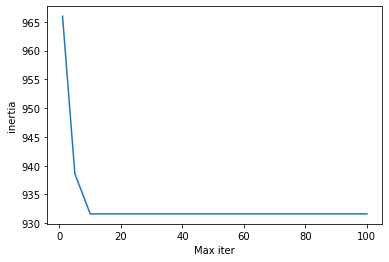

In [37]:
max_iter_list = [1, 5, 10, 20, 30, 40, 50, 100]

plt.plot(max_iter_list,
         [get_kmeans_ineratia_varying_max_iter(x) for x in max_iter_list]
        )
plt.xlabel('Max iter')
plt.ylabel('inertia')


In [ ]:
# kmeans = KMeans(n_clusters=8,
#                 init="random",
#                 n_init=3,  # try with 1, 4, 8, 20, 30, 100...
#                 max_iter=2,
#                 tol=0,
#                 algorithm="full",
#                 random_state=1234)
# kmeans.fit(X_prep)
# print(kmeans.inertia_)